# 婚姻品質是否會導致婚外情?

### 許sir

原始論文(A Theory of Extramarital Affairs ) https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf

- rate_marriage(婚姻品質): How rate marriage,
    - 1 = very poor,
    - 2 = poor,
    - 3 = fair,
    - 4 = good,
    - 5 = very good
    
- age (年齡): Age
- yrs_married(結婚多久) : No. years married. Interval approximations. See original paper for detailed explanation.
- children(有沒有小孩) : No. children
- religious(宗教虔誠度) : How relgious,
    - 1 = not,
    - 2 = mildly,
    - 3 = fairly,
    - 4 = strongly
- educ(教育程度) : Level of education,
    - 9 = grade school,
    - 12 = high school,
    - 14 = some college,
    - 16 = college graduate,
    - 17 = some graduate school,
    - 20 = advanced degree
- occupation(職業) :
    - 1 = student,
    - 2 = farming, agriculture; semi-skilled,or unskilled worker;
    - 3 = white-colloar;
    - 4 = teacher counselor social worker, nurse; artist, writers; technician, skilled worker,
    - 5 = managerial, administrative, business,
    - 6 = professional with advanced degree
    
- occupation_husb(老公的職業) : Husband’s occupation. Same as occupation.
- affairs (婚外情): measure of time spent in extramarital affairs

>## [資料準備與清理]


In [26]:
#如果你用python的目標是科學計算或數值分析，基本是引⼊三個套件

%matplotlib inline 
##將後續畫圖的結果直接顯現在網頁中

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  #

In [2]:
fair = pd.read_csv("data/fair.csv")

In [3]:
fair.head() #看前五筆資料

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,0.111111
1,3,27.0,13.0,3.0,1,14,3,4,3.230769
2,4,22.0,2.5,0.0,1,16,3,5,1.400000
3,4,37.0,16.5,4.0,3,16,5,5,0.727273
4,5,27.0,9.0,1.0,1,14,3,4,4.666666


In [4]:
print(fair.shape)# 印出資料維度

(6366, 9)


In [5]:
fair.dtypes #查詢資料型態

rate_marriage        int64
age                float64
yrs_married        float64
children           float64
religious            int64
educ                 int64
occupation           int64
occupation_husb      int64
affairs            float64
dtype: object

#### 本文中共有三個類別變數要做轉換: 
- 職業 (occupation)
- 老公的職業 (occupation_husb)
- 宗教的虔誠度 (religious)

In [6]:
#將三個應該是類別變數的轉為類別
fair["occupation"] = fair["occupation"].astype("category")
fair["occupation_husb"] = fair["occupation_husb"].astype("category")
fair["religious"] = fair["religious"].astype("category")


In [7]:
fair.dtypes #查詢資料型態

rate_marriage         int64
age                 float64
yrs_married         float64
children            float64
religious          category
educ                  int64
occupation         category
occupation_husb    category
affairs             float64
dtype: object

>## [PART 1]. 敘述性統計

In [8]:
fair.describe() #基本統計量

,rate_marriage,age,yrs_married,children,educ,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,14.209865,0.705374
std,0.961430,6.847882,7.280120,1.433471,2.178003,2.203374
min,1.000000,17.500000,0.500000,0.000000,9.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,12.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,14.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,16.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,20.000000,57.599991


In [17]:
#看一下不同職業不同教育程度的卡方列聯表有多少人
Cross1 = pd.crosstab(fair['educ'], fair['occupation']) #建立交叉列聯表
Cross1

occupation,1,2,3,4,5,6
educ,,,,,,
9,0,25,12,6,4,1
12,3,492,1194,165,226,4
14,26,250,1260,422,305,14
16,2,54,263,649,134,15
17,6,26,42,369,55,12
20,4,12,12,223,16,63


In [15]:
#不同教育程度與職業的平均離婚率
fair.pivot_table('affairs', index='educ', columns='occupation') #樞紐分析表 (數字內容為平均數)

occupation,1,2,3,4,5,6
educ,,,,,,
9,NaN,0.623524,0.751292,0.315217,0.186182,0.076923
12,1.037037,0.654303,0.647941,0.756689,0.774509,6.719997
14,0.426622,0.918284,0.858709,0.579569,0.970028,0.888824
16,0.000000,0.358394,0.724386,0.499880,0.586366,0.736189
17,0.518518,0.925000,0.715238,0.666559,0.903009,0.853769
20,0.038043,0.634936,1.389343,0.349108,0.210852,1.103019


In [16]:
#不同教育程度與職業的婚姻品質
fair.pivot_table('rate_marriage', index='educ', columns='occupation') #樞紐分析表 (數字內容為平均數)

occupation,1,2,3,4,5,6
educ,,,,,,
9,NaN,3.480000,3.833333,3.833333,3.500000,2.000000
12,4.000000,4.077236,4.027638,4.048485,4.030973,4.750000
14,4.423077,4.088000,4.034921,4.170616,4.059016,4.357143
16,4.000000,4.314815,4.224335,4.271186,4.283582,3.933333
17,3.833333,3.461538,4.119048,4.260163,4.181818,4.250000
20,4.750000,4.250000,4.416667,4.183857,4.375000,4.174603


### 我們可以發現，例如: 
- occupation(5/ managerial, administrative, business) vs. educ(14/some college)
    - 這個組合的樣本數 n=305
    - 婚姻品質(rate_marriage) = 4.059016
    - 離婚率(affairs) = 0.970028

- 婚姻品質還不錯，但是離婚率高到嚇人

In [18]:
#那他們平均來說，維持了幾年婚姻呢?
fair.pivot_table('yrs_married', index='educ', columns='occupation') #樞紐分析表 (數字內容為平均數)


occupation,1,2,3,4,5,6
educ,,,,,,
9,NaN,13.660000,13.916667,16.250000,19.750000,13.000000
12,4.000000,9.717480,9.889866,10.639394,13.050885,6.375000
14,5.961538,8.160000,8.420238,9.806872,10.526230,9.928571
16,6.000000,6.768519,5.678707,7.306626,7.339552,6.566667
17,3.250000,6.230769,9.440476,8.012195,8.145455,7.708333
20,9.250000,10.250000,9.125000,10.181614,8.593750,9.269841


>## [PART 2]. 相關與ANOVA

In [19]:
import seaborn as sns

Text(0.5, 1, 'Correlation Heatmap')

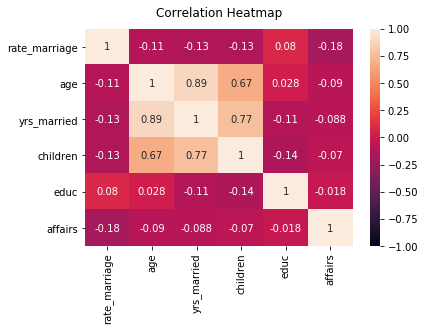

In [20]:
heatmap = sns.heatmap(fair.corr(), vmin=-1, vmax=1, annot=True) #相關係數熱區圖
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


### 2-1. One-Way ANOVA

#### - H0: 不同職業的婚外情平均數相等
#### - H1: 至少有一種職業的婚外情平均和其他職業不相等

In [30]:
#create an Ordinary Least Squares (OLS) model as a precursor to the ANOVA. 
from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
model = ols('affairs ~ occupation', fair).fit() #builds the OLS model, predicting weight loss with diet type.

In [34]:
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(table) 

                  sum_sq      df         F    PR(>F)
occupation     86.243777     5.0  3.560032  0.003236
Residual    30814.913769  6360.0       NaN       NaN


#### Reject H0。在α = 0.05下，我們有顯著的證據認為，職業對婚外情有差異。但是究竟誰高誰低，兩兩之間誰跟誰有差異? 我們需要進行ANOVA的事後多重比較

### 2-2. 事後檢定(採用Tukey )

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(fair['affairs'], fair['occupation'])
tkresult = mc.tukeyhsd()
 
print(tkresult)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.2935    0.9 -0.7095  1.2966  False
     1      3   0.3292    0.9 -0.6579  1.3163  False
     1      4   0.1299    0.9 -0.8609  1.1207  False
     1      5   0.3892 0.8724 -0.6175  1.3959  False
     1      6   0.7683 0.4007 -0.3812  1.9178  False
     2      3   0.0357    0.9 -0.2092  0.2806  False
     2      4  -0.1636 0.4684 -0.4231  0.0958  False
     2      5   0.0957    0.9  -0.219  0.4103  False
     2      6   0.4747 0.2764 -0.1632  1.1127  False
     3      4  -0.1993 0.0314  -0.388 -0.0106   True
     3      5     0.06    0.9 -0.1996  0.3195  False
     3      6   0.4391  0.318 -0.1736  1.0517  False
     4      5   0.2593 0.0746  -0.014  0.5325  False
     4      6   0.6384 0.0385  0.0198   1.257   True
     5      6   0.3791 0.5395 -0.2646  1.0228  False
----------------------------------------------

#### 由上表可以看出，
- white-colloar(3) 和 teacher counselor social worker, nurse; artist, writers; technician, skilled worker(4)有顯著差異
- teacher counselor social worker, nurse; artist, writers; technician, skilled worker(4) 和 professional with advanced degree(6)


### [回家作業]: 同學可以試做 two-way ANOVA，自行決定變數

## [PART 3]. 迴歸分析

In [36]:
fair.describe() #基本統計量

,rate_marriage,age,yrs_married,children,educ,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,14.209865,0.705374
std,0.961430,6.847882,7.280120,1.433471,2.178003,2.203374
min,1.000000,17.500000,0.500000,0.000000,9.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,12.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,14.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,16.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,20.000000,57.599991


In [37]:
#複製一組資料集來做下列的運算，避免做錯被覆蓋
df2 = fair.copy() #整份資料要copy成另一份時

In [38]:
import statsmodels.api as sm

### 3-1. 簡單迴歸

### Model 1: 有小孩真的比較不會離婚?


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('affairs ~ children', data=df2).fit() #簡單迴歸
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                affairs   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.59
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.99e-08
Time:                        15:33:33   Log-Likelihood:                -14046.
No. Observations:                6366   AIC:                         2.810e+04
Df Residuals:                    6364   BIC:                         2.811e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8563      0.038     22.259      0.0

### Model 2: 婚姻品質越好越不會離婚?

In [41]:
results = smf.ols('affairs ~ rate_marriage', data=df2).fit() #簡單迴歸
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                affairs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     208.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.66e-46
Time:                        15:38:03   Log-Likelihood:                -13959.
No. Observations:                6366   AIC:                         2.792e+04
Df Residuals:                    6364   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3825      0.119     19.969

### 3-2. 複迴歸

### Model 3: 婚外情到底受到那些因素影響

In [39]:
X = df2[["rate_marriage", "age", "yrs_married","children","educ"]]
y = df2["affairs"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                affairs   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              160.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                   5.46e-161
Time:                        15:30:27   Log-Likelihood:                         -13994.
No. Observations:                6366   AIC:                                  2.800e+04
Df Residuals:                    6361   BIC:                                  2.803e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.2875      0.026    -11.049      0.000      -0.339      -0.236
age               0.0493      0.008      6.396      0.000       0.034       0.064
yrs_married      -0.0650      0.009     -7.050      0.000      -0.083      -0.047
children          0.0028      0.030      0.094      0.925      -0.056       0.062
educ              0.0704      0.012      6.088      0.000       0.048       0.093
==============================================================================
Omnibus:                     9309.618   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4863007.522
Skew:                           8.693   Prob(JB):                         0.00
Kurtosis:                     137.281   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### [小結]. 在alpha=0.05下，我們有顯著的證據支持，婚姻品質(rate_marriage)對婚外情有負向的影響